In [1]:
# Import Packages
import pandas as pd
from quantbt import Portfolio, yfDataHandler

print('Modules Loaded Successfully!')

Modules Loaded Successfully!


In [59]:
# Initialize some data sets from Yahoo finance
syms = ["AAPL","META","NFLX","AMZN","GOOG"]

# Yahoo Finance data source
dataSource = yfDataHandler(syms)

# Get the raw data
dates,prices = dataSource.getDataFromSource('2014-01-01','2023-09-20',formatOut='dictionary')


[*********************100%%**********************]  5 of 5 completed


In [61]:
# Initialize Portfolio object
samplePortfolio = Portfolio({},100.0,name='Sample Portfolio',datadump=False)

# Set some costs for realistic assumption
samplePortfolio.setFixedTransactionCosts({asset:0.0001 for asset in syms})
samplePortfolio.setBorrowCosts({asset:0.004 for asset in syms})
samplePortfolio.setAnnualManagementFee(0)

# Define Rebalance Trigger - Every Week on Fridays
rebalanceTrigger = pd.tseries.offsets.Week(weekday=4)

# Simple Static Weights For Rebalance - Equal weight at each rebalance
targetWeights = { sym : 1/len(syms) for sym in syms }

print('Portfolios Initalized!')

Portfolios Initalized!


In [62]:
print(f'Beginning backtest from {dates[0]} to {dates[-1]}')

for i,date in enumerate(dates):
    
    # Design strategy rules here
    if date == rebalanceTrigger.rollforward(date):
        samplePortfolio.rebalance(targetWeights,prices[date],date)

    # Log / sign pnl at every iteration 
    samplePortfolio.signOff(date,prices[date])

print('Backtest Complete!')

Beginning backtest from 2014-01-02 00:00:00 to 2023-09-19 00:00:00
Backtest Complete!


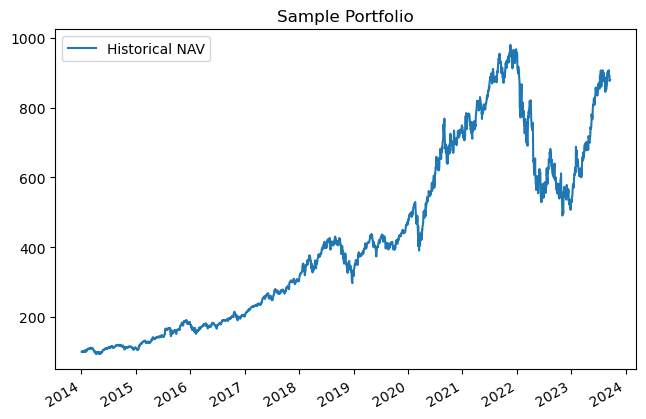

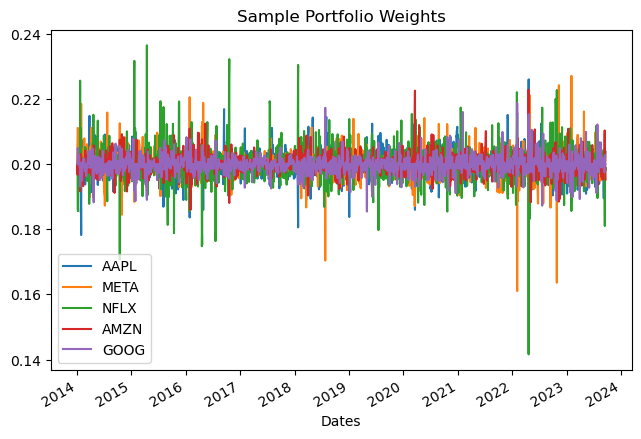

In [63]:
# Examine Portfolio Performance
samplePortfolio.plotNAV();
samplePortfolio.plotWeights();

In [64]:
samplePortfolio.getPerformanceStatistics(historical=False).T

,2023-09-19
Annual Returns,0.250827
Annual Volatility,0.276660
Sharpe Ratio,0.906628
Cumulative Return,7.801277
Maximum Drawdown,-0.499346
Sortino Ratio,1.182494
Calmar Ratio,-0.502312
Total Transaction Costs,0.453858
